### Análise Exploratória dos Dados 

Neste tópico realizamos uma análise preliminar dos dados para gerar os primiros insights.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("base_de_dados_limpa.csv")

In [4]:
df.head()

,Unnamed: 0,ID,Nome,Genero,Idade (anos),Etnia,Formação,Estado,Tempo de casa (meses),Departamento,Senioridade
0,0,2FF7,Eleonora Arilda Penedo Gomes de Padilha,Feminino,34.0,Pardo,Ensino Médio,SC,12.0,Compras,Analista Pleno
1,1,3B34,Elisângela Gabrielle de Osório,Feminino,26.0,Pardo,Ensino Médio,PA,6.0,Contabilidade,Analista Júnior
2,2,F606,José Túlio de Cabral,Masculino,35.0,Pardo,Ensino Médio,SC,5.0,Vendas,Analista Pleno
3,3,6B20,Ezequiel Edivaldo de Medeiros Sonao,Masculino,24.0,Pardo,Ensino Superior,TO,4.0,Administrativo,Gerente
4,4,A208,Fagner Josiel dos Santos,Masculino,21.0,Pardo,Ensino Superior,CE,5.0,Recursos Humanos,Analista Júnior


Verificando a distribuição demográfica por genêro

In [13]:
genero_counts = df['Genero'].value_counts()

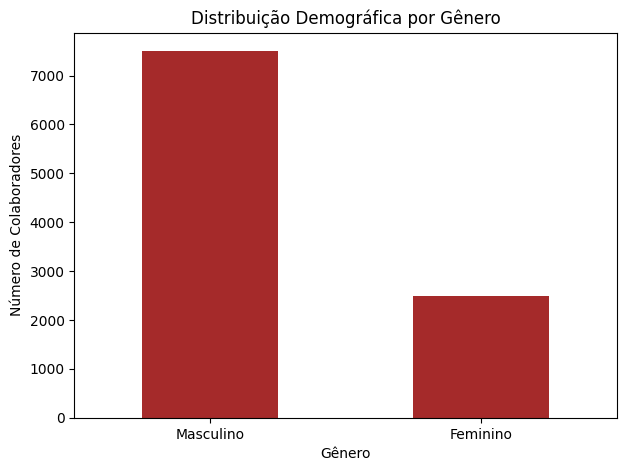

In [21]:
plt.figure(figsize=(7, 5))
genero_counts.plot(kind='bar', color='brown')
plt.title('Distribuição Demográfica por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=0)
plt.show()

Distribuição demográfica por etnia

In [16]:
etnia_counts = df['Etnia'].value_counts()

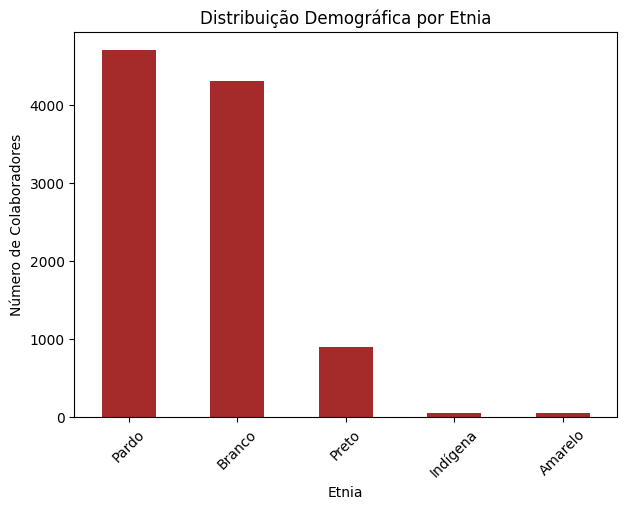

In [22]:
plt.figure(figsize=(7, 5))
etnia_counts.plot(kind='bar', color='brown')
plt.title('Distribuição Demográfica por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.show()

Distribuição de Colaboradores por etnia e gênero

In [18]:
etnia_genero_counts = df.groupby(['Etnia', 'Genero']).size().unstack(fill_value=0)

<Figure size 700x500 with 0 Axes>

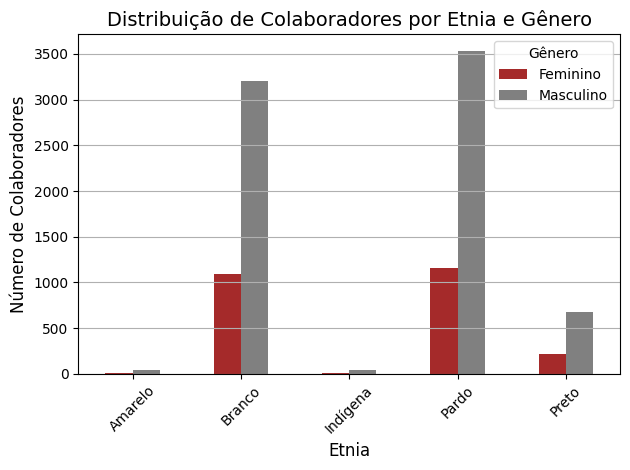

In [24]:
plt.figure(figsize=(7, 5))
etnia_genero_counts.plot(kind='bar', color= ['brown', 'gray'])
plt.title('Distribuição de Colaboradores por Etnia e Gênero', fontsize=14)
plt.xlabel('Etnia', fontsize=12)
plt.ylabel('Número de Colaboradores', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gênero', fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Distribuição por Etnia, Gênero e Senioridade

In [80]:
etnia_gen_sen_counts = df[['Etnia', 'Genero','Senioridade']].value_counts()
etnia_gen_sen_counts

Etnia     Genero     Senioridade    
Pardo     Masculino  Analista Júnior    1056
Branco    Masculino  Analista Júnior     935
Pardo     Masculino  Analista Pleno      843
Branco    Masculino  Analista Pleno      834
Pardo     Masculino  Analista Sênior     704
Branco    Masculino  Analista Sênior     644
Pardo     Masculino  Gerente             567
Branco    Masculino  Gerente             470
Pardo     Feminino   Analista Júnior     363
Branco    Feminino   Analista Júnior     338
Pardo     Masculino  Estagiário          332
          Feminino   Analista Pleno      298
Branco    Masculino  Estagiário          286
          Feminino   Analista Pleno      282
                     Analista Sênior     225
Pardo     Feminino   Analista Sênior     216
Preto     Masculino  Analista Júnior     208
Pardo     Feminino   Gerente             182
Preto     Masculino  Analista Pleno      164
Branco    Feminino   Gerente             147
Preto     Masculino  Analista Sênior     135
                  

In [47]:
df[['Etnia', 'Genero', 'Senioridade']][(df['Senioridade'] == 'Diretor') | (df['Senioridade'] == 'Gerente')].value_counts()

Etnia     Genero     Senioridade
Pardo     Masculino  Gerente        567
Branco    Masculino  Gerente        470
Pardo     Feminino   Gerente        182
Branco    Feminino   Gerente        147
Preto     Masculino  Gerente         97
Branco    Masculino  Diretor         37
Pardo     Masculino  Diretor         36
Preto     Feminino   Gerente         24
Branco    Feminino   Diretor         12
Indígena  Masculino  Gerente          7
Preto     Masculino  Diretor          4
Amarelo   Masculino  Gerente          3
Indígena  Feminino   Gerente          2
Amarelo   Feminino   Gerente          1
Indígena  Masculino  Diretor          1
Name: count, dtype: int64

Distribuição Genêro e Etnia por cargos de diretoria e gerencia

In [52]:
filtro_cargos = (df['Senioridade'] == 'Diretor') | (df['Senioridade'] == 'Gerente')
dados_filtrados = df[filtro_cargos]

etnia_gen_sen_counts = dados_filtrados.groupby(['Etnia', 'Genero', 'Senioridade']).size().unstack(fill_value=0)

In [53]:
dados_genero_masculino = etnia_gen_sen_counts.xs('Masculino', level='Genero')
dados_genero_feminino = etnia_gen_sen_counts.xs('Feminino', level='Genero')

<Figure size 1000x600 with 0 Axes>

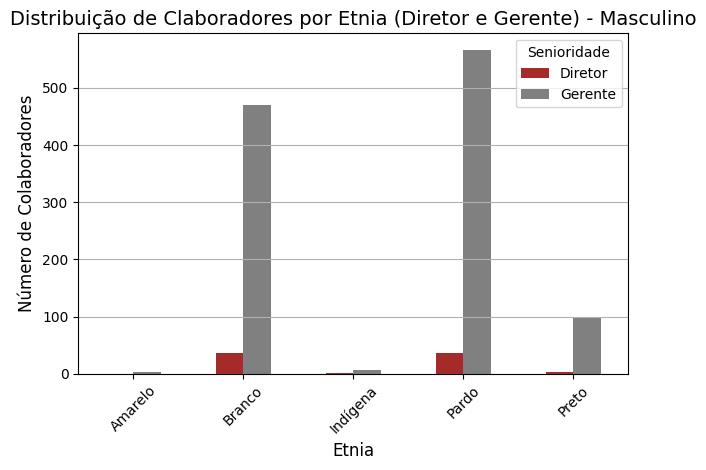

<Figure size 1000x600 with 0 Axes>

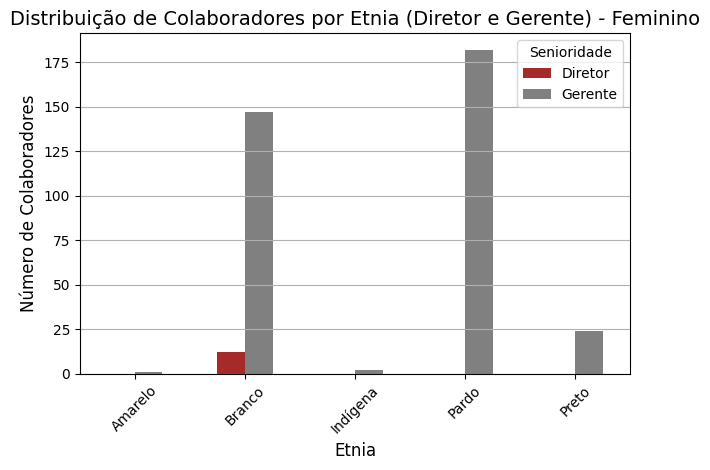

In [55]:

plt.figure(figsize=(10, 6))
dados_genero_masculino.plot(kind='bar', color= ['brown', 'gray'])
plt.title('Distribuição de Claboradores por Etnia (Diretor e Gerente) - Masculino', fontsize=14)
plt.xlabel('Etnia', fontsize=12)
plt.ylabel('Número de Colaboradores', fontsize=12)
plt.xticks(rotation=45)  
plt.legend(title='Senioridade', fontsize=10)
plt.grid(axis='y')
plt.tight_layout() 

plt.figure(figsize=(10, 6))
dados_genero_feminino.plot(kind='bar', color= ['brown', 'gray'])
plt.title('Distribuição de Colaboradores por Etnia (Diretor e Gerente) - Feminino', fontsize=14)
plt.xlabel('Etnia', fontsize=12)
plt.ylabel('Número de Colaboradores', fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title='Senioridade', fontsize=10)
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()


Distribuição por idade

Text(0, 0.5, 'Frequência')

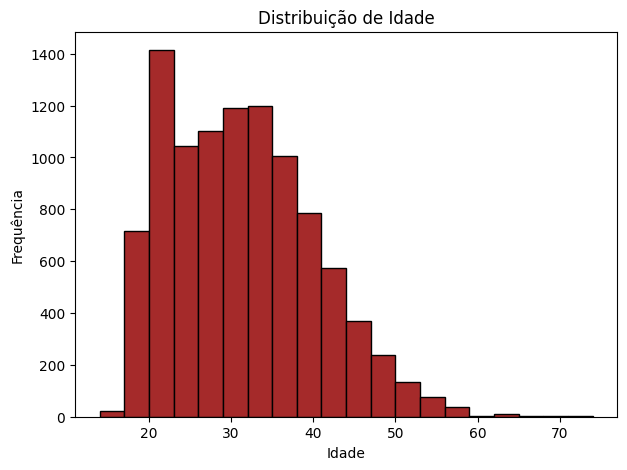

In [75]:
plt.figure(figsize=(7, 5))
df['Idade (anos)'].plot(kind='hist', bins=20, color='brown', edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

Distribuição por Estado

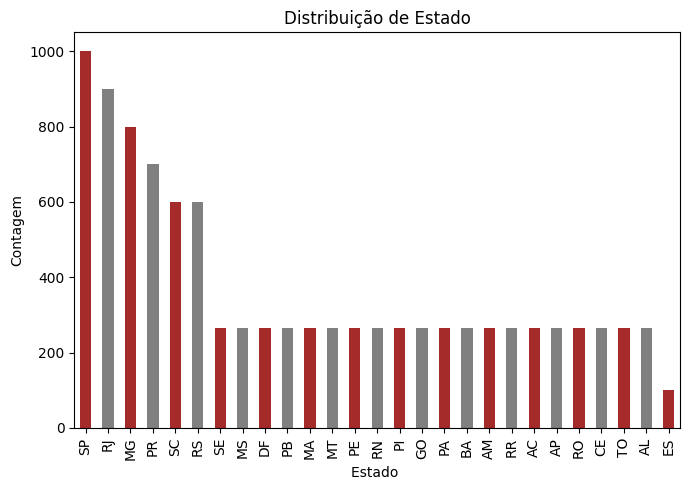

In [78]:
plt.figure(figsize=(7, 5))
df['Estado'].value_counts().plot(kind='bar', color=['brown', 'gray'])
plt.title('Distribuição de Estado')
plt.xlabel('Estado ')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()